In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
from collections import OrderedDict
import cftime
import glob

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

In [2]:
client = Client()
client

Client Scheduler: tcp://127.0.0.1:37849 Dashboard: /proxy/8787/status,Cluster Workers: 8 Cores: 48 Memory: 202.49 GB


In [3]:
session = cc.database.create_session('/g/data/ik11/databases/SAMx.db')

In [4]:
## 1deg cases
#cc.database.build_index('/g/data/hh5/tmp/cosima/access-om2/1deg_jra55_ryf9091_kds50_july_bkd',session,update=True)
#cc.database.build_index('/g/data/hh5/tmp/cosima/access-om2/1deg_jra55_ryf9091_kds50_july',session,update=True)
#cc.database.build_index(glob.glob('/g/data/hh5/tmp/cosima/access-om2/1deg_jra55_SAMextr_ryf????_from9091_kds50'),session,update=True)

## 025deg case
#cc.database.build_index('/g/data/hh5/tmp/cosima/access-om2-025/025deg_jra55v13_ryf9091_gmredi6',session,update=True)
#cc.database.build_index(glob.glob('/g/data/hh5/tmp/cosima/access-om2-025/025deg_jra55v13_SAMx_????_from_ryf9091_yr160_gmredi6'),session,update=True)

## 01deg case
#cc.database.build_index('/g/data/ik11/outputs/access-om2-01/01deg_jra55v13_ryf9091',session,update=True)
#cc.database.build_index(glob.glob('/g/data/hh5/tmp/cosima/access-om2-01/01deg_jra55_SAMextr*'),session,update=True)

Indexing experiment: 1deg_jra55_ryf9091_kds50_july


0it [00:00, ?it/s]


0

In [31]:
exptdict = OrderedDict([
    ('01deg_RYF9091',   {'expt':'01deg_jra55v13_ryf9091','dir':'access-om2-01','color':'k','line':'-'}),
    ('01deg_SAM-0203',   {'expt':'01deg_jra55_SAMextr_0203_from9091','dir':'access-om2-01','color':'c','line':'-'}),
    ('01deg_SAM+9899',   {'expt':'01deg_jra55_SAMextr_9899_from9091','dir':'access-om2-01','color':'b','line':'-'}),
    ('01deg_SAM-9192',   {'expt':'01deg_jra55_SAMextr_9192_from9091','dir':'access-om2-01','color':'orange','line':'-'}),
    ('01deg_SAM+1011',   {'expt':'01deg_jra55_SAMextr_1011_from9091_kial','dir':'access-om2-01','color':'m','line':'-'}),
    ('025deg_RYF9091',  {'expt':'025deg_jra55v13_ryf9091_gmredi6','dir':'access-om2-025','color':'k','line':'--'}),
    ('025deg_SAM-0203',  {'expt':'025deg_jra55v13_SAMx_0203_from_ryf9091_yr160_gmredi6','dir':'access-om2-025','color':'c','line':'--'}),
    ('025deg_SAM+9899',  {'expt':'025deg_jra55v13_SAMx_9899_from_ryf9091_yr160_gmredi6','dir':'access-om2-025','color':'orange','line':'--'}),
    ('025deg_SAM-9192',  {'expt':'025deg_jra55v13_SAMx_9192_from_ryf9091_yr160_gmredi6','dir':'access-om2-025','color':'b','line':'--'}),
    ('025deg_SAM+1011',  {'expt':'025deg_jra55v13_SAMx_1011_from_ryf9091_yr160_gmredi6','dir':'access-om2-025','color':'m','line':'--'}),
    ('1deg_RYF9091',  {'expt':'1deg_jra55_ryf9091_kds50_july_bkd','dir':'access-om2','color':'k','line':'-.'}),
    ('1deg_SAM-0203',  {'expt':'1deg_jra55_SAMextr_ryf0203_from9091_kds50','dir':'access-om2','color':'c','line':'-.'}),
    ('1deg_SAM+9899',  {'expt':'1deg_jra55_SAMextr_ryf9899_from9091_kds50','dir':'access-om2','color':'orange','line':'-.'}),
    ('1deg_SAM-9192',  {'expt':'1deg_jra55_SAMextr_ryf9192_from9091_kds50','dir':'access-om2','color':'b','line':'-.'}),
    ('1deg_SAM+1011',  {'expt':'1deg_jra55_SAMextr_ryf1011_from9091_kds50','dir':'access-om2','color':'m','line':'-.'})
                        ])


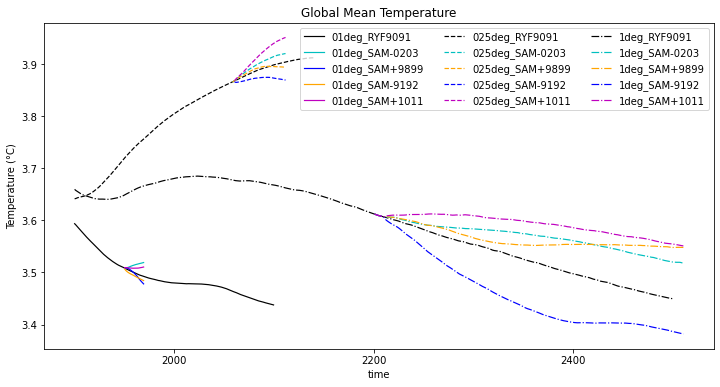

In [32]:
plt.figure(figsize=(12,6))
for ekey in exptdict.keys():
    variable = 'temp_global_ave'
    expt = exptdict[ekey]['expt']
    color = exptdict[ekey]['color']
    line = exptdict[ekey]['line']
    var = cc.querying.getvar(expt,variable,session)
    var.resample(time='A').mean().plot(color=color,linestyle=line,linewidth=1.2,label=ekey)

plt.legend(ncol=3,loc=1)
plt.title('Global Mean Temperature')
plt.ylabel('Temperature (°C)')

plt.savefig('Experiments.pdf')

1deg_jra55_ryf9091_kds50_july_bkd
1deg_jra55_SAMextr_ryf9899_from9091_kds50
1deg_jra55_SAMextr_ryf1011_from9091_kds50


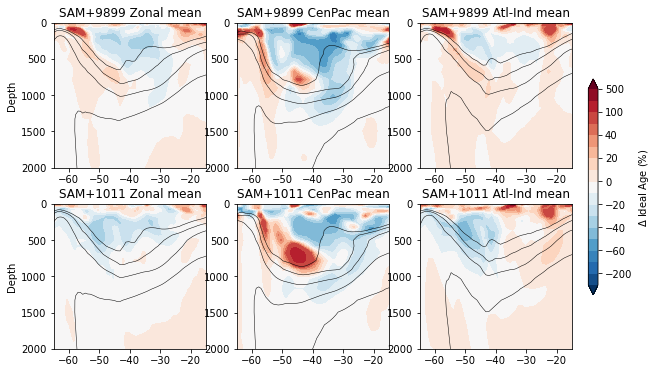

In [34]:
variable = 'age_global'
start_time='2229-01-01'
end_time = '2229-12-31'
lev1 = [-500,  -200, -100, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 100, 200, 500]
lev2 = [25, 50, 100, 200, 300]
ekey='1deg_RYF9091'
expt = exptdict[ekey]['expt']
print(expt)
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2200-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
zonalage_RYF = var.mean('time').mean('xt_ocean')
CPage_RYF = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
AIage_RYF = xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean')

fig,ax = plt.subplots(2,3,figsize=(9,6))
plt.subplots_adjust(left=0.075, right=0.875,hspace=0.25)
ii=0
for ekey in ['1deg_SAM+9899','1deg_SAM+1011']:#,'1deg_SAM-9192','1deg_SAM-0203']:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2200-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
    zonalage_SAM = 100*(var.mean('time').mean('xt_ocean') - zonalage_RYF)/zonalage_RYF
    #zonalage_SAM = (var.mean('time').mean('xt_ocean') - zonalage_RYF)
    p1 = zonalage_SAM.plot.contourf(ax=ax[ii,0],levels=lev1, extend='both', add_colorbar=False)
    zonalage_RYF.plot.contour(ax=ax[ii,0],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,0].set_xlim([-65,-15])
    ax[ii,0].set_ylim([0,2000])
    ax[ii,0].set_ylabel('Depth')
    if ii<3:
        ax[ii,0].set_xlabel('')
    else:
        ax[ii,0].set_xlabel('Latitude')    
    ax[ii,0].invert_yaxis()
    ax[ii,0].set_title(ekey.lstrip('1deg_')+' Zonal mean')
    
    CPage_SAM = 100*(var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean') - CPage_RYF)/CPage_RYF
    CPage_SAM.plot.contourf(ax=ax[ii,1],levels=lev1, extend='both', add_colorbar=False)
    CPage_RYF.plot.contour(ax=ax[ii,1],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,1].set_xlim([-65,-15])
    ax[ii,1].set_ylim([0,2000])
    ax[ii,1].set_ylabel('')
    if ii<3:
        ax[ii,1].set_xlabel('')
    else:
        ax[ii,1].set_xlabel('Latitude')
    ax[ii,1].invert_yaxis()
    ax[ii,1].set_title(ekey.lstrip('1deg_')+' CenPac mean')
    
    
    wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
    wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
    AIage_SAM = 100*(xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean') - AIage_RYF)/AIage_RYF
    AIage_SAM.plot.contourf(ax=ax[ii,2],levels=lev1, extend='both', add_colorbar=False)
    AIage_RYF.plot.contour(ax=ax[ii,2],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,2].set_xlim([-65,-15])
    ax[ii,2].set_ylim([0,2000])
    ax[ii,2].set_ylabel('')
    if ii<3:
        ax[ii,2].set_xlabel('')
    else:
        ax[ii,2].set_xlabel('Latitude')
    ax[ii,2].invert_yaxis()
    ax[ii,2].set_title(ekey.lstrip('1deg_')+' Atl-Ind mean')
    
    ii+=1
    
ax_cb = plt.axes([0.9, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, cax=ax_cb,orientation='vertical')
cb.set_label('$\Delta$ Ideal Age (%)')
plt.savefig('Age_yr19_1deg.pdf')

# 0.25° Resolution

025deg_jra55v13_ryf9091_gmredi6
025deg_jra55v13_SAMx_9899_from_ryf9091_yr160_gmredi6
025deg_jra55v13_SAMx_1011_from_ryf9091_yr160_gmredi6


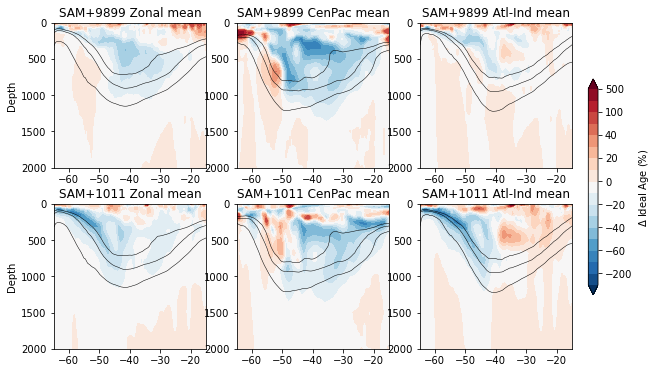

In [35]:
variable = 'age_global'
start_time='2079-01-01'
end_time = '2079-12-31'
lev1 = [-500,  -200, -100, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 100, 200, 500]
lev2 = [25, 50, 100, 200, 300]
ekey='025deg_RYF9091'
expt = exptdict[ekey]['expt']
print(expt)
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2060-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
zonalage_RYF = var.mean('time').mean('xt_ocean')
CPage_RYF = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
AIage_RYF = xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean')

fig,ax = plt.subplots(2,3,figsize=(9,6))
plt.subplots_adjust(left=0.075, right=0.875,hspace=0.25)
ii=0
for ekey in ['025deg_SAM+9899','025deg_SAM+1011']:#,'025deg_SAM-9192','025deg_SAM-0203']:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2060-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
    zonalage_SAM = 100*(var.mean('time').mean('xt_ocean') - zonalage_RYF)/zonalage_RYF
    #zonalage_SAM = (var.mean('time').mean('xt_ocean') - zonalage_RYF)
    p1 = zonalage_SAM.plot.contourf(ax=ax[ii,0],levels=lev1, extend='both', add_colorbar=False)
    zonalage_RYF.plot.contour(ax=ax[ii,0],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,0].set_xlim([-65,-15])
    ax[ii,0].set_ylim([0,2000])
    ax[ii,0].set_ylabel('Depth')
    if ii<3:
        ax[ii,0].set_xlabel('')
    else:
        ax[ii,0].set_xlabel('Latitude')    
    ax[ii,0].invert_yaxis()
    ax[ii,0].set_title(ekey.lstrip('025deg_')+' Zonal mean')
    
    CPage_SAM = 100*(var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean') - CPage_RYF)/CPage_RYF
    CPage_SAM.plot.contourf(ax=ax[ii,1],levels=lev1, extend='both', add_colorbar=False)
    CPage_RYF.plot.contour(ax=ax[ii,1],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,1].set_xlim([-65,-15])
    ax[ii,1].set_ylim([0,2000])
    ax[ii,1].set_ylabel('')
    if ii<3:
        ax[ii,1].set_xlabel('')
    else:
        ax[ii,1].set_xlabel('Latitude')
    ax[ii,1].invert_yaxis()
    ax[ii,1].set_title(ekey.lstrip('025deg_')+' CenPac mean')
    
    
    wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
    wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
    AIage_SAM = 100*(xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean') - AIage_RYF)/AIage_RYF
    AIage_SAM.plot.contourf(ax=ax[ii,2],levels=lev1, extend='both', add_colorbar=False)
    AIage_RYF.plot.contour(ax=ax[ii,2],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,2].set_xlim([-65,-15])
    ax[ii,2].set_ylim([0,2000])
    ax[ii,2].set_ylabel('')
    if ii<3:
        ax[ii,2].set_xlabel('')
    else:
        ax[ii,2].set_xlabel('Latitude')
    ax[ii,2].invert_yaxis()
    ax[ii,2].set_title(ekey.lstrip('025deg_')+' Atl-Ind mean')
    
    ii+=1
    
ax_cb = plt.axes([0.9, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, cax=ax_cb,orientation='vertical')
cb.set_label('$\Delta$ Ideal Age (%)')
plt.savefig('Age_yr19_025.pdf')

# 0.1° Resolution

01deg_jra55v13_ryf9091
01deg_jra55_SAMextr_9899_from9091
01deg_jra55_SAMextr_1011_from9091_kial


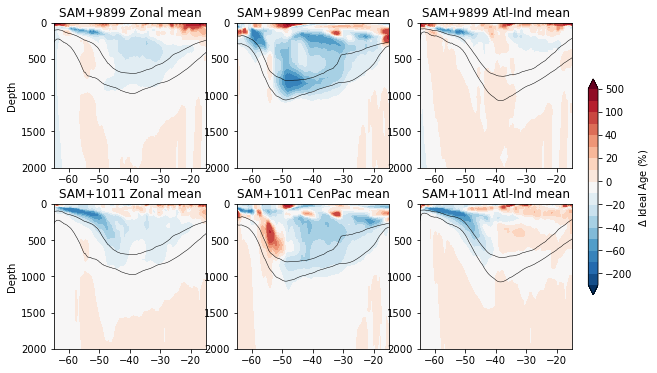

In [38]:
variable = 'age_global'
start_time='1969-01-01'
end_time = '1969-12-31'
lev1 = [-500,  -200, -100, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 100, 200, 500]
lev2 = [25, 50, 100, 200, 300]
ekey='01deg_RYF9091'
expt = exptdict[ekey]['expt']
print(expt)
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='1950-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
zonalage_RYF = var.mean('time').mean('xt_ocean')
CPage_RYF = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
AIage_RYF = xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean')

fig,ax = plt.subplots(2,3,figsize=(9,6))
plt.subplots_adjust(left=0.075, right=0.875,hspace=0.25)
ii=0
for ekey in ['01deg_SAM+9899','01deg_SAM+1011']:#,'01deg_SAM-9192','01deg_SAM-0203']:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='1950-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
    zonalage_SAM = 100*(var.mean('time').mean('xt_ocean') - zonalage_RYF)/zonalage_RYF
    #zonalage_SAM = (var.mean('time').mean('xt_ocean') - zonalage_RYF)
    p1 = zonalage_SAM.plot.contourf(ax=ax[ii,0],levels=lev1, extend='both', add_colorbar=False)
    zonalage_RYF.plot.contour(ax=ax[ii,0],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,0].set_xlim([-65,-15])
    ax[ii,0].set_ylim([0,2000])
    ax[ii,0].set_ylabel('Depth')
    if ii<3:
        ax[ii,0].set_xlabel('')
    else:
        ax[ii,0].set_xlabel('Latitude')    
    ax[ii,0].invert_yaxis()
    ax[ii,0].set_title(ekey.lstrip('01deg_')+' Zonal mean')
    
    CPage_SAM = 100*(var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean') - CPage_RYF)/CPage_RYF
    CPage_SAM.plot.contourf(ax=ax[ii,1],levels=lev1, extend='both', add_colorbar=False)
    CPage_RYF.plot.contour(ax=ax[ii,1],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,1].set_xlim([-65,-15])
    ax[ii,1].set_ylim([0,2000])
    ax[ii,1].set_ylabel('')
    if ii<3:
        ax[ii,1].set_xlabel('')
    else:
        ax[ii,1].set_xlabel('Latitude')
    ax[ii,1].invert_yaxis()
    ax[ii,1].set_title(ekey.lstrip('01deg_')+' CenPac mean')
    
    
    wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
    wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
    AIage_SAM = 100*(xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean') - AIage_RYF)/AIage_RYF
    AIage_SAM.plot.contourf(ax=ax[ii,2],levels=lev1, extend='both', add_colorbar=False)
    AIage_RYF.plot.contour(ax=ax[ii,2],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,2].set_xlim([-65,-15])
    ax[ii,2].set_ylim([0,2000])
    ax[ii,2].set_ylabel('')
    if ii<3:
        ax[ii,2].set_xlabel('')
    else:
        ax[ii,2].set_xlabel('Latitude')
    ax[ii,2].invert_yaxis()
    ax[ii,2].set_title(ekey.lstrip('01deg_')+' Atl-Ind mean')
    
    ii+=1
    
ax_cb = plt.axes([0.9, 0.25, 0.015, 0.5])
cb = plt.colorbar(p1, cax=ax_cb,orientation='vertical')
cb.set_label('$\Delta$ Ideal Age (%)')
plt.savefig('Age_yr19_01.pdf')

1deg_jra55_SAMextr_ryf9899_from9091_kds50
1deg_jra55_SAMextr_ryf1011_from9091_kds50
1deg_jra55_SAMextr_ryf9192_from9091_kds50
1deg_jra55_SAMextr_ryf0203_from9091_kds50


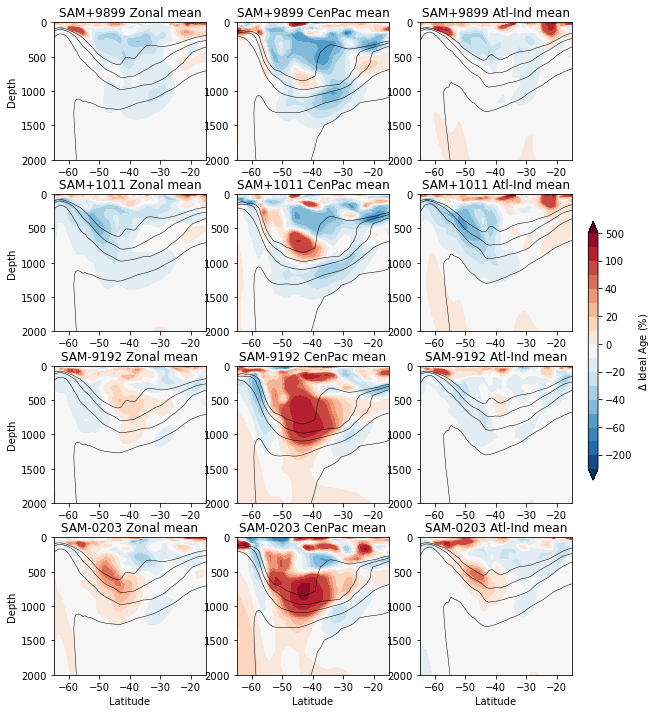

In [27]:
## This one is the one that matches Darryn's plots.
## Note that it uses 1deg_jra55_ryf9091_kds50_july, which I think is wrong - we should be using 1deg_jra55_ryf9091_kds50_july_bkd.

variable = 'age_global'
start_time='2229-01-01'
end_time = '2229-12-31'
lev1 = [-500,  -200, -100, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 100, 200, 500]
lev2 = [25, 50, 100, 200, 300]
ekey='1deg_RYF9091'
expt = exptdict[ekey]['expt']
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2200-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
zonalage_RYF = var.mean('time').mean('xt_ocean')
CPage_RYF = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
AIage_RYF = xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean')

fig,ax = plt.subplots(4,3,figsize=(9,12))
plt.subplots_adjust(left=0.075, right=0.875,hspace=0.25)
ii=0
for ekey in ['1deg_SAM+9899','1deg_SAM+1011','1deg_SAM-9192','1deg_SAM-0203']:
    expt = exptdict[ekey]['expt']
    print(expt)
    var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2200-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
    zonalage_SAM = 100*(var.mean('time').mean('xt_ocean') - zonalage_RYF)/zonalage_RYF
    #zonalage_SAM = (var.mean('time').mean('xt_ocean') - zonalage_RYF)
    p1 = zonalage_SAM.plot.contourf(ax=ax[ii,0],levels=lev1, extend='both', add_colorbar=False)
    zonalage_RYF.plot.contour(ax=ax[ii,0],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,0].set_xlim([-65,-15])
    ax[ii,0].set_ylim([0,2000])
    ax[ii,0].set_ylabel('Depth')
    if ii<3:
        ax[ii,0].set_xlabel('')
    else:
        ax[ii,0].set_xlabel('Latitude')    
    ax[ii,0].invert_yaxis()
    ax[ii,0].set_title(ekey.lstrip('1deg_')+' Zonal mean')
    
    CPage_SAM = 100*(var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean') - CPage_RYF)/CPage_RYF
    CPage_SAM.plot.contourf(ax=ax[ii,1],levels=lev1, extend='both', add_colorbar=False)
    CPage_RYF.plot.contour(ax=ax[ii,1],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,1].set_xlim([-65,-15])
    ax[ii,1].set_ylim([0,2000])
    ax[ii,1].set_ylabel('')
    if ii<3:
        ax[ii,1].set_xlabel('')
    else:
        ax[ii,1].set_xlabel('Latitude')
    ax[ii,1].invert_yaxis()
    ax[ii,1].set_title(ekey.lstrip('1deg_')+' CenPac mean')
    
    
    wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
    wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
    AIage_SAM = 100*(xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean') - AIage_RYF)/AIage_RYF
    AIage_SAM.plot.contourf(ax=ax[ii,2],levels=lev1, extend='both', add_colorbar=False)
    AIage_RYF.plot.contour(ax=ax[ii,2],levels=lev2,colors='k',linewidths=0.5)
    
    ax[ii,2].set_xlim([-65,-15])
    ax[ii,2].set_ylim([0,2000])
    ax[ii,2].set_ylabel('')
    if ii<3:
        ax[ii,2].set_xlabel('')
    else:
        ax[ii,2].set_xlabel('Latitude')
    ax[ii,2].invert_yaxis()
    ax[ii,2].set_title(ekey.lstrip('1deg_')+' Atl-Ind mean')
    
    ii+=1
    
ax_cb = plt.axes([0.9, 0.35, 0.015, 0.3])
cb = plt.colorbar(p1, cax=ax_cb,orientation='vertical')
cb.set_label('$\Delta$ Ideal Age (%)')
plt.savefig('Age.pdf')

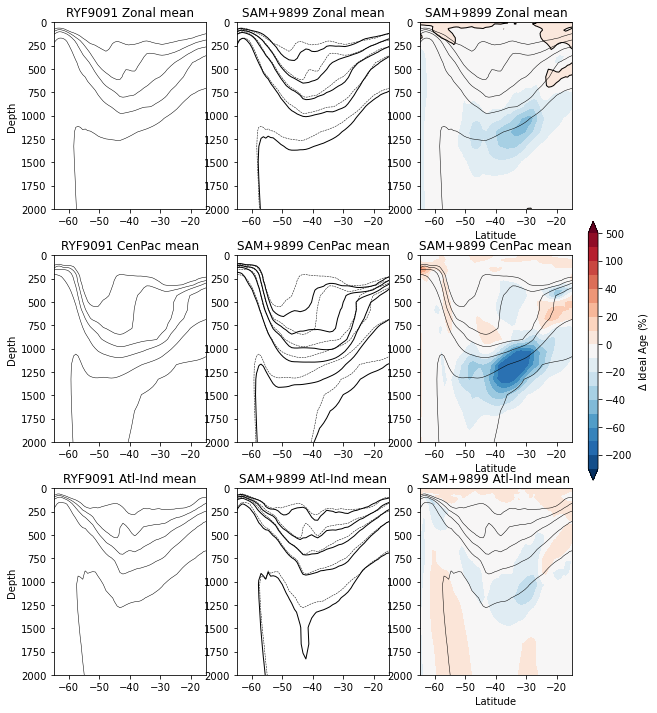

In [80]:
## This one plots absolute age to chross-check differences with Darryn
variable = 'age_global'
start_time='2229-01-01'
end_time = '2229-12-31'
lev1 = [-500,  -200, -100, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 100, 200, 500]
lev2 = [10,25, 50, 100, 200, 300]

ekey='1deg_RYF9091'
expt = exptdict[ekey]['expt']
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2200-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
zonalage_RYF = var.mean('time').mean('xt_ocean')
CPage_RYF = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
AIage_RYF = var.mean('time').sel(xt_ocean=slice(-60,120)).mean('xt_ocean')

fig,ax = plt.subplots(3,3,figsize=(9,12))
plt.subplots_adjust(left=0.075, right=0.875,hspace=0.25)
ii=0
zonalage_RYF.plot.contour(ax=ax[0,ii],levels=lev2,colors='k',linewidths=0.5)
CPage_RYF.plot.contour(ax=ax[1,ii],levels=lev2,colors='k',linewidths=0.5)
AIage_RYF.plot.contour(ax=ax[2,ii],levels=lev2,colors='k',linewidths=0.5)

for jj in [0, 1, 2]:
    ax[jj,ii].set_xlim([-65,-15])
    ax[jj,ii].set_ylim([0,2000])
    ax[jj,ii].set_ylabel('Depth')
    if ii<2:
        ax[jj,ii].set_xlabel('')
    else:
        ax[jj,ii].set_xlabel('Latitude')    
    ax[jj,ii].invert_yaxis()

ax[0,ii].set_title(ekey.lstrip('1deg_')+' Zonal mean')
ax[1,ii].set_title(ekey.lstrip('1deg_')+' CenPac mean')
ax[2,ii].set_title(ekey.lstrip('1deg_')+' Atl-Ind mean')


ekey = '1deg_SAM+9899'
expt = exptdict[ekey]['expt']
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='2200-01-01', end_time=end_time).sel(time=slice(start_time,end_time))
zonalage_SAM = var.mean('time').mean('xt_ocean')
CPage_SAM = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
AIage_SAM = var.mean('time').sel(xt_ocean=slice(-60,120)).mean('xt_ocean')

ii=1
zonalage_RYF.plot.contour(ax=ax[0,ii],levels=lev2,colors='k',linestyles='dashed',linewidths=0.5)
zonalage_SAM.plot.contour(ax=ax[0,ii],levels=lev2,colors='k',linewidths=1)
CPage_RYF.plot.contour(ax=ax[1,ii],levels=lev2,colors='k',linestyles='dashed',linewidths=0.5)
CPage_SAM.plot.contour(ax=ax[1,ii],levels=lev2,colors='k',linewidths=1)
AIage_RYF.plot.contour(ax=ax[2,ii],levels=lev2,colors='k',linestyles='dashed',linewidths=0.5)
AIage_SAM.plot.contour(ax=ax[2,ii],levels=lev2,colors='k',linewidths=1)


for jj in [0, 1, 2]:
    ax[jj,ii].set_xlim([-65,-15])
    ax[jj,ii].set_ylim([0,2000])
    ax[jj,ii].set_ylabel('')
    if ii<2:
        ax[jj,ii].set_xlabel('')
    else:
        ax[jj,ii].set_xlabel('Latitude')    
    ax[jj,ii].invert_yaxis()

ax[0,ii].set_title(ekey.lstrip('1deg_')+' Zonal mean')
ax[1,ii].set_title(ekey.lstrip('1deg_')+' CenPac mean')
ax[2,ii].set_title(ekey.lstrip('1deg_')+' Atl-Ind mean')

zonalage_diff = zonalage_SAM - zonalage_RYF
CPage_diff = CPage_SAM - CPage_RYF
AIage_diff = AIage_SAM - AIage_RYF


ii=2
zonalage_RYF.plot.contour(ax=ax[0,ii],levels=lev2,colors='k',linewidths=0.5)
p1=zonalage_diff.plot.contourf(ax=ax[0,ii],levels=lev1, add_colorbar=False, extend='both')
zonalage_diff.plot.contour(ax=ax[0,ii],levels=[0,],colors='k',linewidths=1)
CPage_RYF.plot.contour(ax=ax[1,ii],levels=lev2,colors='k',linewidths=0.5)
CPage_diff.plot.contourf(ax=ax[1,ii],levels=lev1, add_colorbar=False)
AIage_RYF.plot.contour(ax=ax[2,ii],levels=lev2,colors='k',linewidths=0.5)
AIage_diff.plot.contourf(ax=ax[2,ii],levels=lev1, add_colorbar=False)


for jj in [0, 1, 2]:
    ax[jj,ii].set_xlim([-65,-15])
    ax[jj,ii].set_ylim([0,2000])
    ax[jj,ii].set_ylabel('')
    if ii<2:
        ax[jj,ii].set_xlabel('')
    else:
        ax[jj,ii].set_xlabel('Latitude')    
    ax[jj,ii].invert_yaxis()

ax[0,ii].set_title(ekey.lstrip('1deg_')+' Zonal mean')
ax[1,ii].set_title(ekey.lstrip('1deg_')+' CenPac mean')
ax[2,ii].set_title(ekey.lstrip('1deg_')+' Atl-Ind mean')


ax_cb = plt.axes([0.9, 0.35, 0.015, 0.3])
cb = plt.colorbar(p1, cax=ax_cb,orientation='vertical')
cb.set_label('$\Delta$ Ideal Age (%)')
plt.savefig('Age.pdf')

# Saving output for Darryn

In [11]:
##01deg
#start_time='1969-01-01'
#end_time = '1969-12-31'
#ekey='01deg_RYF9091'
#ekey='01deg_SAM-0203'
#ekey='01deg_SAM+9899'
#ekey='01deg_SAM-9192'
#ekey='01deg_SAM+1011'

## 025deg
start_time='2079-01-01'
end_time = '2079-12-31'
#ekey = '025deg_RYF9091'
#ekey='025deg_SAM-0203'
#ekey='025deg_SAM+9899'
#ekey='025deg_SAM-9192'
ekey='025deg_SAM+1011'

expt = exptdict[ekey]['expt']
print(expt)

variable = 'age_global'
#######################
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='1950-01-01', end_time=end_time).sel(time=slice(start_time,end_time))

ZonalMeanAge = var.mean('time').mean('xt_ocean')
ZonalMeanAge.name = 'age_zonal_mean'
ZonalMeanAge.attrs['long_name'] = 'Zonal Mean Ideal Age'
ZonalMeanAge.attrs['units'] = var.attrs['units']

CenPacAge = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
CenPacAge.name = 'age_cen_pac'
CenPacAge.attrs['long_name'] = 'Zonal Mean Ideal Age in Central Pacific (170W to 100W)'
CenPacAge.attrs['units'] = var.attrs['units']

wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
AtlIndAge = xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean')
AtlIndAge.name = 'age_atl_ind'
AtlIndAge.attrs['long_name'] = 'Zonal Mean Ideal Age in Atlantic-Indian (60W to 120E)'
AtlIndAge.attrs['units'] = var.attrs['units']

variable = 'pot_rho_2'
#######################
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time='1950-01-01', end_time=end_time).sel(time=slice(start_time,end_time))

ZonalMeanRho = var.mean('time').mean('xt_ocean')
ZonalMeanRho.name = 'pot_rho_2_zonal_mean'
ZonalMeanRho.attrs['long_name'] = 'Zonal Mean potential density referenced to 2000 dbar'
ZonalMeanRho.attrs['units'] = var.attrs['units']

CenPacRho = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
CenPacRho.name = 'pot_rho_2_cen_pac'
CenPacRho.attrs['long_name'] = 'Zonal Mean potential density referenced to 2000 dbar in Central Pacific (170W to 100W)'
CenPacRho.attrs['units'] = var.attrs['units']

wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
AtlIndRho = xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean')
AtlIndRho.name = 'pot_rho_2_atl_ind'
AtlIndRho.attrs['long_name'] = 'Zonal Mean potential density referenced to 2000 dbar in Atlantic-Indian (60W to 120E)'
AtlIndRho.attrs['units'] = var.attrs['units']


combined_array = xr.merge([ZonalMeanAge, CenPacAge, AtlIndAge, ZonalMeanRho, CenPacRho, AtlIndRho])
FileName = '/g/data/v45/amh157/Darryn/'+ekey+'.nc'
combined_array.to_netcdf(FileName)
print('Done'+FileName)

025deg_jra55v13_SAMx_1011_from_ryf9091_yr160_gmredi6
Done/g/data/v45/amh157/Darryn/025deg_SAM+1011.nc


## Plotting age bifold

01deg_jra55v13_ryf9091


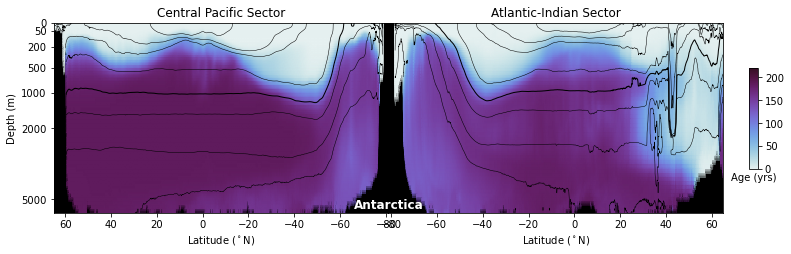

In [29]:
variable = 'age_global'
start_time='2086-01-01'
end_time = '2086-12-31'
lev1 = [-500,  -200, -100, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 100, 200, 500]
lev2 = [25, 50, 100, 200, 300]
ekey='01deg_RYF9091'
expt = exptdict[ekey]['expt']
print(expt)
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time=start_time, end_time=end_time).sel(time=slice(start_time,end_time))
CPage_RYF = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
AIage_RYF = xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean')
variable='pot_rho_2'
var = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time=start_time, end_time=end_time).sel(time=slice(start_time,end_time))-1000
CPpotrho_RYF = var.mean('time').sel(xt_ocean=slice(-170,-100)).mean('xt_ocean')
wrk1 = var.mean('time').sel(xt_ocean=slice(-60,None))
wrk2 = var.mean('time').sel(xt_ocean=slice(None,-240))
AIpotrho_RYF = xr.concat([wrk1, wrk2], dim='xt_ocean').mean('xt_ocean')
lat = var.yt_ocean.values
depth = var.st_ocean.values

fig,ax = plt.subplots(1,2,figsize=(12,3.5))
plt.subplots_adjust(wspace=0)
yticks = np.array([0, 50, 200, 500, 1000, 2000, 5000])

ax[0].pcolormesh(lat,(depth+50)**(0.5),CPage_RYF,cmap=cm.cm.dense,vmin=0,vmax=220,shading='gouraud')
ax[0].contour(lat,(depth+50)**(0.5),CPpotrho_RYF,levels=[30, 32, 34, 35, 36, 36.8, 37, 37.1, 37.2],colors='k',linewidths = 0.5)
ax[0].contour(lat,(depth+50)**(0.5),CPpotrho_RYF,levels=[36.5,],colors='k',linewidths = 1.0)
ax[0].invert_yaxis()
ax[0].invert_xaxis()
ax[0].set_xlim(xmin=65)
ax[0].set_yticks((yticks+50)**(0.5))
ax[0].set_yticklabels(yticks)
ax[0].set_title('Central Pacific Sector')
ax[0].set_facecolor('k')
ax[0].set_ylabel('Depth (m)')
ax[0].set_xlabel('Latitude ($^\circ$N)')


p1=ax[1].pcolormesh(lat,(depth+50)**(0.5),AIage_RYF,cmap=cm.cm.dense,vmin=0,vmax=220,shading='gouraud')
ax[1].contour(lat,(depth+50)**(0.5),AIpotrho_RYF,levels=[30, 32, 34, 35, 36, 36.8, 37, 37.1, 37.2],colors='k',linewidths = 0.5)
ax[1].contour(lat,(depth+50)**(0.5),AIpotrho_RYF,levels=[36.5,],colors='k',linewidths = 1.0)
ax[1].invert_yaxis()
ax[1].set_xlim(xmax=65)
ax[1].set_ylabel('')
ax[1].set_yticks([])
ax[1].set_title('Atlantic-Indian Sector')
ax[1].set_facecolor('k')
ax[1].set_xlabel('Latitude ($^\circ$N)')

plt.text(0.0,0.04,'Antarctica',color='w', fontsize=12,fontweight='bold',horizontalalignment='center',verticalalignment='center', transform=ax[1].transAxes)

ax_cb = plt.axes(position=(0.93, 0.3, 0.01, 0.4))
cb=plt.colorbar(p1, cax=ax_cb, orientation='vertical')
cb.ax.set_xlabel('Age (yrs)')

plt.savefig('AgeBifold.png')

## Bottom Age

In [42]:
variable = 'age_global'
start_time='2099-01-01'
end_time = '2099-12-31'
ekey='01deg_RYF9091'
expt = exptdict[ekey]['expt']
print(expt)
age = cc.querying.getvar(expt,variable,session,ncfile='ocean.nc',start_time=start_time, end_time=end_time).sel(time=slice(start_time,end_time)).mean('time')

variable='kmt'
kmt = cc.querying.getvar(expt,variable,session,ncfile='ocean_grid.nc', n=-1).fillna(1.0).astype(int) - 1
kmt.load()

bottom_age = age[kmt]

bottom_age

01deg_jra55v13_ryf9091


<xarray.DataArray 'age_global' (yt_ocean: 2700, xt_ocean: 3600)>
dask.array<reshape, shape=(2700, 3600), dtype=float32, chunksize=(2700, 3600), chunktype=numpy.ndarray>
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
    st_ocean  (yt_ocean, xt_ocean) float64 0.5413 0.5413 ... 0.5413 0.5413
    geolon_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    geolat_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan

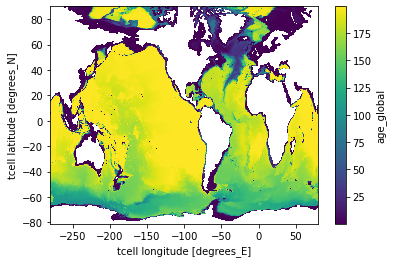

In [43]:
bottom_age.plot()

In [40]:
age

,Array,Chunk
Bytes,34.99 GB,3.36 MB
Shape,"(12, 75, 2700, 3600)","(1, 7, 300, 400)"
Count,37427 Tasks,10692 Chunks
Type,float32,numpy.ndarray


In [41]:
kmt

<xarray.DataArray 'kmt' (yt_ocean: 2700, xt_ocean: 3600)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
    geolon_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan
    geolat_t  (yt_ocean, xt_ocean) float32 nan nan nan nan ... nan nan nan nan